In [79]:
import pandas as pd 
import seaborn as sn 
import sklearn as sk 
import numpy as np

In [80]:
df = pd.read_csv('boston.csv')

In [81]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [82]:
#independent features and dependent features
X = df[['CRIM',	'ZN'	,'INDUS',	'CHAS'	,'NOX',	'RM',	'AGE',	'DIS',	'RAD'	,'TAX'	,'PTRATIO',	'B'	,'LSTAT']]
y = df['MEDV']

In [83]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [84]:
#train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)


In [85]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666.0,20.2,109.85,23.27


In [86]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [87]:
X_train = scaler.fit_transform(X_train)

In [88]:
X_test = scaler.transform(X_test)

# Ridge-Lasso Regression Practical 

## Ridge

In [121]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [122]:
ridge_regressor = Ridge()

In [123]:
ridge_regressor

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [124]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
ridgecv = GridSearchCV(ridge_regressor,parameters,scoring = 'neg_mean_squared_error',cv=5)

In [125]:
ridgecv.fit(X_train,y_train)

,estimator,Ridge()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,10


In [126]:
print(ridgecv.best_params_)

{'alpha': 10}


In [127]:
print(ridgecv.best_score_)

-25.80722882229147


In [128]:
ridge_pred=ridgecv.predict(X_test)


<Axes: xlabel='MEDV', ylabel='Count'>

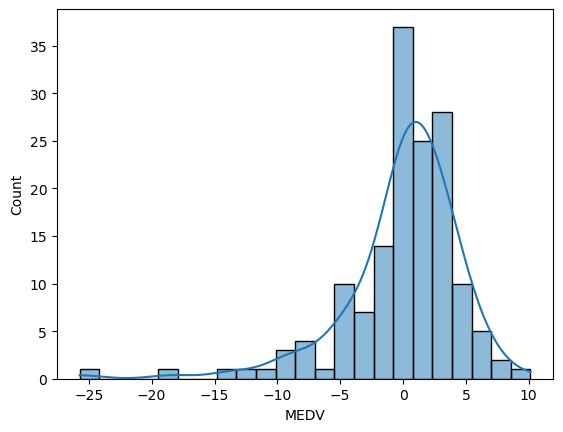

In [131]:
import seaborn as sns
sns.histplot(ridge_pred-y_test,kde =True)

In [132]:
from sklearn.metrics import r2_score

In [151]:
score = r2_score(ridge_pred,y_test)

In [152]:
score 

0.6468557055633651

## Lasso

In [138]:
from sklearn.linear_model import Lasso

In [140]:
lasso_regressor = Lasso()

In [141]:
lasso_regressor

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [142]:
parameters = {'alpha':[1,2,5,10,20,30,40,50,60,70,80,90]}
lassocv = GridSearchCV(lasso_regressor,parameters,scoring = 'neg_mean_squared_error',cv=5)

In [143]:
lassocv.fit(X_train,y_train)

,estimator,Lasso()
,param_grid,"{'alpha': [1, 2, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,alpha,1


In [146]:
print(lassocv.best_params_)

{'alpha': 1}


In [147]:
print(lassocv.best_score_)

-31.153603752119004


In [148]:
lasso_pred=lassocv.predict(X_test)


<Axes: xlabel='MEDV', ylabel='Count'>

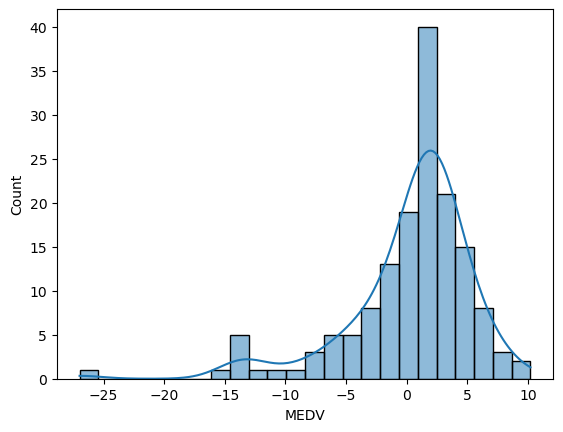

In [149]:
import seaborn as sns
sns.histplot(lasso_pred-y_test,kde =True)

In [150]:
from sklearn.metrics import r2_score

In [153]:
score = r2_score(lasso_pred,y_test)

In [154]:
score

0.32577461229516547